# Customer Support AI Agent Project

In [458]:
#importing all libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [459]:
#load dataset
df=pd.read_csv(r'C:\Users\Source\OneDrive - IESEG\Documents\Data Projects\Customer Support AI Agent\Data - Kaggle\customer_support_tickets.csv')
df.head(3)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0


In [460]:
# df shape
print(df.shape)

# df columns and their meanings
print('\n',df.columns)

# Check missing values in all features
print(df.isna().sum())

# See all features and their types
df.dtypes


(8469, 17)

 Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Custom

Ticket ID                         int64
Customer Name                    object
Customer Email                   object
Customer Age                      int64
Customer Gender                  object
Product Purchased                object
Date of Purchase                 object
Ticket Type                      object
Ticket Subject                   object
Ticket Description               object
Ticket Status                    object
Resolution                       object
Ticket Priority                  object
Ticket Channel                   object
First Response Time              object
Time to Resolution               object
Customer Satisfaction Rating    float64
dtype: object

Features Description:

    Ticket ID: A unique identifier for each ticket.
    Customer Name: The name of the customer who raised the ticket.
    Customer Email: The email address of the customer (Domain name - @example.com is intentional for user data privacy concern).
    Customer Age: The age of the customer.
    Customer Gender: The gender of the customer.
    Product Purchased: The tech product purchased by the customer.
    Date of Purchase: The date when the product was purchased.
    Ticket Type: The type of ticket (e.g., technical issue, billing inquiry, product inquiry).
    Ticket Subject: The subject/topic of the ticket.
    Ticket Description: The description of the customer's issue or inquiry.
    Ticket Status: The status of the ticket (e.g., open, closed, pending customer response).
    Resolution: The resolution or solution provided for closed tickets.
    Ticket Priority: The priority level assigned to the ticket (e.g., low, medium, high, critical).
    Ticket Channel: The channel through which the ticket was raised (e.g., email, phone, chat, social media).
    First Response Time: The time taken to provide the first response to the customer.
    Time to Resolution: The time taken to resolve the ticket.
    Customer Satisfaction Rating: The customer's satisfaction rating for closed tickets (on a scale of 1 to 5).


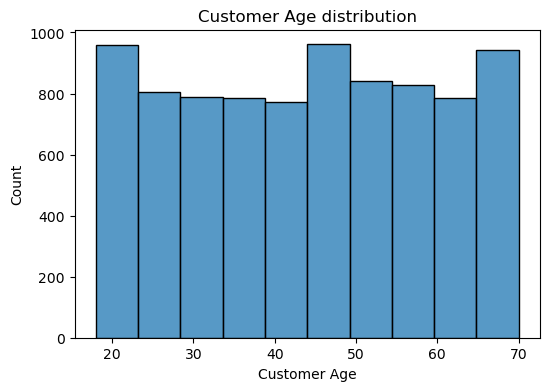

In [461]:
# Customer Age distribution
plt.figure(figsize=(6,4))
sns.histplot(data=df['Customer Age'], bins=10)
plt.title('Customer Age distribution')
plt.show()


Age distribution shows a wide spread, with most customers between 20–50 years. This highlights that support demand spans both younger and mid-age groups, suggesting products attract a broad user base.

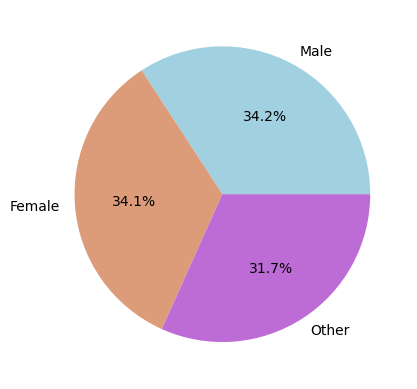

In [462]:
# Gender Distribution
gender_dist=df['Customer Gender'].value_counts()
gender_dist
plt.pie(gender_dist, autopct='%.1f%%',labels=gender_dist.index, colors=["#A1D0E1", "#DC9B79", "#BD6CD6"])
plt.show()

Gender distribution is balanced across male, female, and other, which suggests no skewed representation and allows generalization of insights across demographics.

In [463]:
# Min and Max Date of Purchase
print('Oldest Purchase date: ',df['Date of Purchase'].min())
print('Recent Purchase date: ',df['Date of Purchase'].max())

Oldest Purchase date:  2020-01-01
Recent Purchase date:  2021-12-30


In [464]:
# Ticket Type distribution:
df['Ticket Type'].value_counts()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

Tickets are spread almost evenly across five major categories: refund requests, technical issues, cancellations, product inquiries, and billing inquiries. No single issue type dominates, but all of them carry weight.

Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64


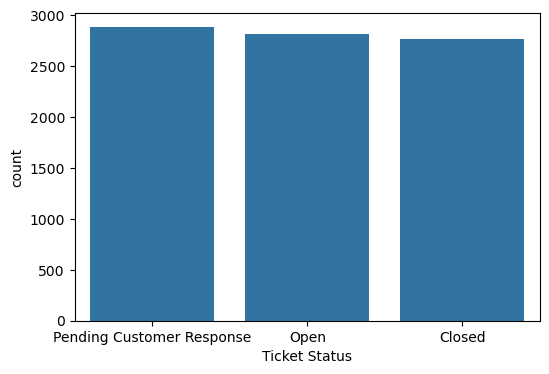

In [495]:
# ticket status distribution - open tickets, pending customer response vs closed
print(df['Ticket Status'].value_counts())

plt.figure(figsize=(6,4))
sns.barplot(data=df['Ticket Status'].value_counts())
plt.show()

Status shows a heavy backlog: only about a third of tickets are closed, the rest are still open or waiting on customers.

In [466]:
# Ticket Priority Distribution
df['Ticket Priority'].value_counts()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

Tickets are evenly spread across priority levels

Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64


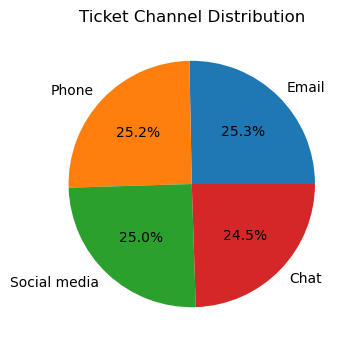

In [467]:
# Ticket Channel Distribution
channel_dist=df['Ticket Channel'].value_counts()
print(channel_dist)

plt.figure(figsize=(6,4))
plt.pie(channel_dist, labels=channel_dist.index, autopct='%.1f%%')
plt.title('Ticket Channel Distribution')
plt.show()

Customers contact support equally via email, phone, chat, and social media.

In [468]:
# Customer Satisfaction Rating Distribution
print(df['Customer Satisfaction Rating'].isna().sum())
df['Customer Satisfaction Rating'].value_counts()

5700


Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

Satisfaction ratings are only available for resolved tickets, spread evenly across scores 1–5. A large portion of tickets have no rating since they are still open.

In [469]:
# Convert Date of Purchase, First Response Time and Time to Resolution to pandas datetime
for col in ['Date of Purchase', 'First Response Time', 'Time to Resolution']: 
    df[col]=pd.to_datetime(df[col])
    print(f"{col} has type: {df[col].dtype}")

Date of Purchase has type: datetime64[ns]
First Response Time has type: datetime64[ns]
Time to Resolution has type: datetime64[ns]


In [470]:
# checking time to resolution null values
df[df['Resolution'].isnull()].head(5)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaT,NaT,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaT,NaT,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaT,NaT,NaN


In [471]:
# Checking if resolution is null then if time of resolution and customer satisfaction is also null
check_nulls = df.groupby(df['Resolution'].isna())[["Time to Resolution", "Customer Satisfaction Rating"]].apply(lambda x: x.isna().mean())
print(check_nulls)

            Time to Resolution  Customer Satisfaction Rating
Resolution                                                  
False                      0.0                           0.0
True                       1.0                           1.0


logically, if a ticket was never resolved, it shouldn’t have a resolution timestamp or a satisfaction rating. So our assumption checks out that all 3 are null.

In [472]:
# checking if First Response time is null
df[df['First Response Time'].isnull()].head(5)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaT,NaT,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaT,NaT,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaT,NaT,NaN
18,19,Wendy Davis,brenda20@example.net,19,Male,LG Washing Machine,2021-09-23,Product inquiry,Peripheral compatibility,I'm having an issue with the {product_purchase...,Open,NaN,High,Social media,NaT,NaT,NaN
22,23,Stephanie Nelson DVM,ljohnson@example.org,54,Female,Xbox,2020-02-11,Cancellation request,Delivery problem,I'm having an issue with the {product_purchase...,Open,NaN,Medium,Social media,NaT,NaT,NaN


We can interpret that null response time means agents have not yet handled these case, so we can segment null tickets into two categories: 
- unresolved (when resolution, time of resolution and customer rating are null)
- unchecked (when first reponse is null)

In [473]:
# Creating features for unresolved and unchecked tickets
df['unresolved_ticket']=pd.isnull(df['Time to Resolution']) #connect to the other two which are also null of this is null
df['unchecked_ticket']=pd.isnull(df['First Response Time'])

In [474]:
# creating a df of solved tickets from unsolved tickets (not unsolved=solved)
df_solved = df[~df['unresolved_ticket']].copy()


In [475]:
# checking time taken to resolve issues (assuming First )
df_solved['ticket_age_days'] = (df_solved['Time to Resolution'] - df_solved['First Response Time']).dt.days
df_solved['ticket_age_hours'] = (df_solved['Time to Resolution'] - df_solved['First Response Time']) / pd.Timedelta(hours=1)
df_solved['ticket_age_minutes'] = (df_solved['Time to Resolution'] - df_solved['First Response Time']) / pd.Timedelta(minutes=1)

There is an issue with Time to Resolution and First Response Time, some values are negative and that is not possible in a time difference context, we assume that due to some data entry issue Time to Resolution and First Response Time have been swapped and then we rectify this by swapping the columns only when the difference ends in a negative value

In [476]:
# Detect negative cases
mask = (df_solved['Time to Resolution'] - df_solved['First Response Time']).dt.total_seconds() < 0

# Swap only in those cases
df_solved.loc[mask, ['Time to Resolution', 'First Response Time']] = (
    df_solved.loc[mask, ['First Response Time', 'Time to Resolution']].values
)

# Recalculate ticket ages
df_solved['ticket_age_days'] = (df_solved['Time to Resolution'] - df_solved['First Response Time']).dt.days
df_solved['ticket_age_hours'] = (df_solved['Time to Resolution'] - df_solved['First Response Time']) / pd.Timedelta(hours=1)
df_solved['ticket_age_minutes'] = (df_solved['Time to Resolution'] - df_solved['First Response Time']) / pd.Timedelta(minutes=1)

# Check if negatives remain
print("Remaining negatives:", (df_solved['ticket_age_hours'] < 0).sum())


Remaining negatives: 0


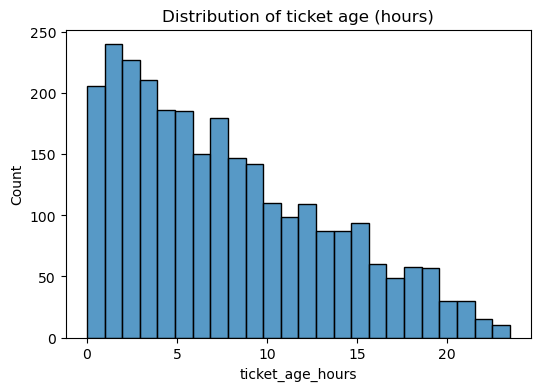

In [477]:
# Check distribution of ticket_age_days, ticket_age_hours, ticket_age_minutes
plt.figure(figsize=(6,4))
sns.histplot(data=df_solved['ticket_age_hours'], bins=24)
plt.title(f'Distribution of ticket age (hours)')
plt.show()

After cleaning, resolution durations are now accurate. The distribution shows many tickets are resolved within hours, but outliers exist where issues linger much longer.

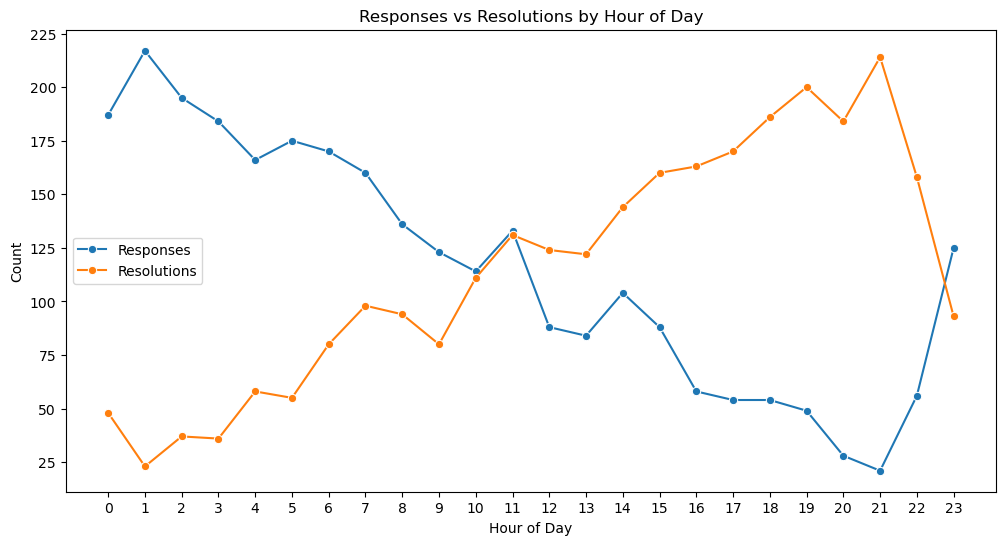

In [478]:
# Response vs Resolution in hourly basis

# Make sure response_hour exists
df_solved['response_hour'] = df_solved['First Response Time'].dt.hour

# Extract resolution_hour
df_solved['resolution_hour'] = df_solved['Time to Resolution'].dt.hour

# Count responses by hour
response_by_hour = df_solved['response_hour'].value_counts().sort_index()

# Count resolutions by hour
resolution_by_hour = df_solved['resolution_hour'].value_counts().sort_index()

# Ensure both series cover all 24 hours (0–23)
all_hours = range(24)
response_by_hour = response_by_hour.reindex(all_hours, fill_value=0)
resolution_by_hour = resolution_by_hour.reindex(all_hours, fill_value=0)

# Build DataFrame for plotting
hourly_df = pd.DataFrame({
    "hour": all_hours,
    "responses": response_by_hour.values,
    "resolutions": resolution_by_hour.values
})

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_df, x="hour", y="responses", label="Responses", marker="o")
sns.lineplot(data=hourly_df, x="hour", y="resolutions", label="Resolutions", marker="o")

plt.title("Responses vs Resolutions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.xticks(range(0,24))
plt.legend()
plt.show()


Responses and resolutions occur mostly within business hours, and their curves are well-aligned. This indicates many tickets are resolved within the same day they are first touched.

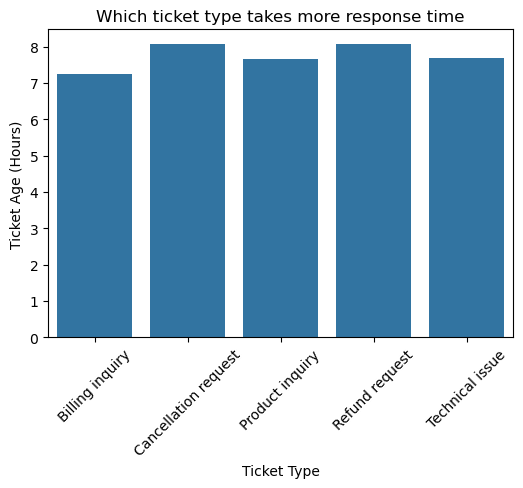

In [479]:
# Avg Time to resolution by ticket type
avg_restime_tickettyp=df_solved.groupby('Ticket Type')['ticket_age_hours'].mean()

plt.figure(figsize=(6,4))
sns.barplot(data=avg_restime_tickettyp)
plt.title('Which ticket type takes more response time')
plt.ylabel('Ticket Age (Hours)')
plt.xticks(rotation=45)
plt.show()

Resolution times are broadly similar across categories, with cancellation and refund requests taking a bit longer. Billing inquiries are handled quickest, which makes sense as they are usually straightforward.

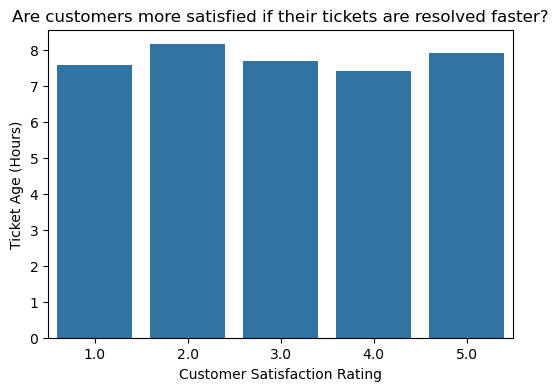

In [491]:
# Customer Satisfaction dependency on Avg Time to resolution
custSat_avgtime_Res=df_solved.groupby('Customer Satisfaction Rating')['ticket_age_hours'].mean()

plt.figure(figsize=(6,4))
sns.barplot(data=custSat_avgtime_Res)
plt.title('Are customers more satisfied if their tickets are resolved faster?')
plt.ylabel('Ticket Age (Hours)')
plt.show()

There isn’t a strong linear relationship between speed and satisfaction. However, tickets resolved extremely slowly (rating 2 group) tend to show lower satisfaction. Other ratings show only modest variation

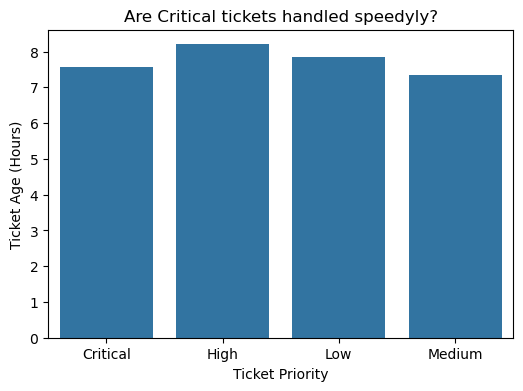

In [492]:
# Avg Resolution time to Priority Tickets
priority_avgRestime=df_solved.groupby('Ticket Priority')['ticket_age_hours'].mean()

plt.figure(figsize=(6,4))
sns.barplot(data=priority_avgRestime)
plt.title('Are Critical tickets handled speedyly?')
plt.ylabel('Ticket Age (Hours)')
plt.show()

Resolution times do not consistently align with ticket priority. Medium priority tickets are handled the quickest, while high priority tickets are the slowest. This suggests that escalation rules are not being enforced effectively.

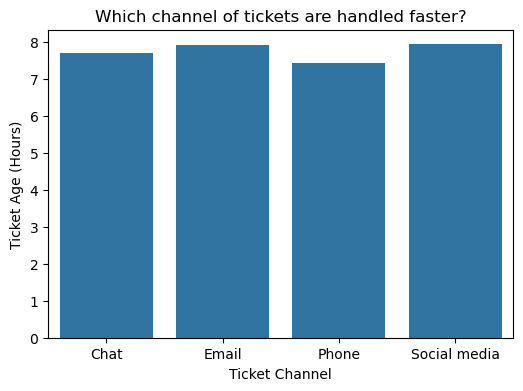

In [493]:
# Avg Resolution time by channel
channel_avgRestime=df_solved.groupby('Ticket Channel')['ticket_age_hours'].mean()

plt.figure(figsize=(6,4))
sns.barplot(data=channel_avgRestime)
plt.title('Which channel of tickets are handled faster?')
plt.ylabel('Ticket Age (Hours)')
plt.show()

Resolution speed varies by channel: phone and chat are quicker, while email and social media are slower. Since social media issues are public, improving resolution speed in that channel could prevent reputational risks.

# EDA Conclusion

Our analysis of **8,469 customer support tickets** highlights both strengths and challenges in support operations.

- **Balanced demand:** Issues are spread across refunds, technical, cancellations, product, and billing inquiries. No single category dominates, but backlog is high with more than half of tickets unresolved.  
- **Resolution times:** Most tickets close within **7–8 hours**. Billing inquiries are resolved quickest, while cancellations and refunds take longer. Priority handling is inconsistent — medium priority is fastest, while high priority is slowest.  
- **Channels:** Phone and chat tickets are resolved faster than email and social media. The lag in social media is risky given its public visibility.  
- **Customer satisfaction:** No simple “faster = happier” link, but very slow tickets are tied to low ratings. Service quality beyond speed likely influences satisfaction.  
- **Work patterns:** Responses and resolutions align within business hours, leaving off-hours demand unmet.

---

### Business Insights
- **Quick wins:** Automate high-volume, simpler cases like billing and refunds to cut backlog.  
- **Risk areas:** Strengthen escalation for critical tickets and improve speed on social media to protect brand reputation.  
- **Future focus:** Extend coverage into off-hours with AI agents to boost efficiency and customer trust.

---

### Next Steps
Building on these insights, we now move toward developing an **AI Support Agent** powered by **Retrieval-Augmented Generation (RAG)** and self-learning capabilities. The goal is to:  
- Reduce backlog by automating simpler, high-volume cases  
- Ensure consistent SLA compliance for critical tickets  
- Extend coverage into off-hours and high-visibility channels  

This AI-driven approach will directly address the operational pain points uncovered in EDA while enhancing customer experience.
